<a href="https://colab.research.google.com/github/dschirmerii/classification/blob/main/Vgg16model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libaries
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf

In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Jul 29 20:10:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dog vs cat/dataset

/content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dog vs cat/dataset


In [6]:
# setting the training/testing data-jng
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./training_set",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="./test_set", target_size=(224,224))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
#Building the model 
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="tanh"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="tanh"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="tanh"))
model.add(Dense(units=4096,activation="tanh"))
model.add(Dense(units=2, activation="softmax"))

Change activation layer to sigmoid

In [8]:
# setting up the optimizer and compiler
from keras.optimizers import *
opt = tf.keras.optimizers.SGD(learning_rate=0.00001,momentum=0.01, nesterov=True)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [9]:
#summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [10]:
# setting up modeling Checkpoints and Early Stopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit(traindata,steps_per_epoch=50, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

Epoch 1/100
 1/50 [..............................] - ETA: 26:32 - loss: 0.7328 - accuracy: 0.5000
Epoch 00001: saving model to vgg16_1.h5
 2/50 [>.............................] - ETA: 11:48 - loss: 0.7160 - accuracy: 0.5312
Epoch 00001: saving model to vgg16_1.h5
 3/50 [>.............................] - ETA: 11:18 - loss: 0.7085 - accuracy: 0.5451
Epoch 00001: saving model to vgg16_1.h5
 4/50 [=>............................] - ETA: 11:57 - loss: 0.7061 - accuracy: 0.5495
Epoch 00001: saving model to vgg16_1.h5
 5/50 [==>...........................] - ETA: 11:27 - loss: 0.7069 - accuracy: 0.5471
Epoch 00001: saving model to vgg16_1.h5
 6/50 [==>...........................] - ETA: 11:17 - loss: 0.7091 - accuracy: 0.5418
Epoch 00001: saving model to vgg16_1.h5
 7/50 [===>..........................] - ETA: 10:49 - loss: 0.7106 - accuracy: 0.5384
Epoch 00001: saving model to vgg16_1.h5
 8/50 [===>..........................] - ETA: 10:40 - loss: 0.7124 - accuracy: 0.5346
Epoch 00001: saving 

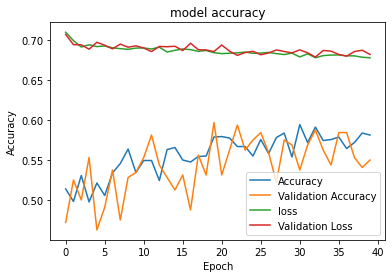

In [13]:
#analysis of model
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [41]:
cd /content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dog vs cat/dataset

/content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dog vs cat/dataset


dog


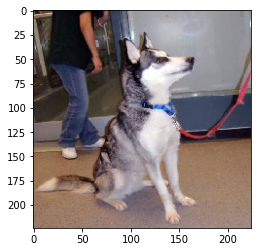

In [45]:
#Testing
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Project 2/archive.zip (Unzipped Files)/dataset/test_set/dogs/dog.4001.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model('vgg16_1.h5')
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("dog")
else:
    print('cat')